### Select features, train, save model for each target

In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

import pickle

In [2]:
mutants = pd.read_csv('../data/all_data_13.csv',index_col=0)
mutants.head(5)

,YAL003W,YAL005C,YAL007C,YAL012W,YAL035W,YAL038W,YAL042W,YAL044C,YAR002C-A,YAR007C,...,D-Fructose 6-phosphate,D-Glucose,D-Glucose 6-phosphate;D-Fructose 6-phosphate;beta-D-glucose 6-phosphate,D-Xylulose 5-phosphate;D-Ribulose 5-phosphate,Dihydroxyacetone phosphate,Glyceraldehyde 3-phosphate,Phosphoenolpyruvate,Pyruvate,Sedoheptulose 7-phosphate,alpha-D-Ribose 5-phosphate
WT,8.719377,8.960088,5.003403,8.743338,5.370779,10.313125,3.935282,6.812850,6.472343,5.387758,...,5248.663203,16459.030703,14109.667929,921.058392,1758.194055,199.991133,76.375142,2065.592332,474.343120,143.661484
YAL017W,8.653198,8.824927,5.155914,8.670526,5.374893,10.272428,2.955933,6.961889,6.299363,5.526707,...,13.066836,17002.046210,13710.190749,951.437296,11.132119,6.455504,1.349970,85.700836,79.431617,0.806534
YAR018C,8.797391,8.550221,4.993235,8.556956,5.578207,10.390911,4.389316,7.254334,6.437292,5.498802,...,19.361500,19919.397972,13448.417525,882.991924,14.230257,5.631380,1.585306,73.672407,108.635344,1.148182
YBL016W,8.543181,8.691758,4.663340,9.116122,3.596748,9.584951,4.563300,8.003110,6.923137,5.737214,...,11798.792914,17113.405359,11784.749618,654.096269,2116.528559,219.251307,103.318199,3495.661987,727.906677,206.846696
YBL088C,8.694384,8.763244,4.984653,9.056300,3.682467,9.651980,4.139872,7.229609,6.447050,5.264817,...,16.298688,14304.146218,12071.678784,604.834183,17.417181,8.438564,1.374669,92.136368,81.188838,1.095210


In [3]:
#selected_variance = pd.read_csv('../data/selection_variance.csv',index_col=0)
#selected_variance.head(5)

### Create x and y for a specific Metabolite

In [4]:
position = 736  # from 726 to are metabolites

In [5]:
#get the name of the column accroding to position
print('Example') 
print(mutants.columns.get_values()[position])

Example
Pyruvate


In [6]:
#choose metabolite (target) by position

x = mutants.iloc[:,0:725]   #stays like this
y = mutants.iloc[:,position]
#y = y/y.max()

### Reduce features according to best individual regression

In [7]:
from sklearn.feature_selection import SelectKBest, f_regression

In [8]:
#create, fit selector and get the best (k) features
selector = SelectKBest(f_regression, k=200)  #200 chosen after for loop
selector.fit(x, y)
mask = selector.get_support()
new_features = x.columns[mask]
new_x = pd.DataFrame(x, columns=new_features)
new_x.head()

,YAL003W,YAL007C,YAL012W,YAL038W,YAL042W,YAR002C-A,YBL039C,YBR011C,YBR035C,YBR072W,...,YPL143W,YPL160W,YPL226W,YPL231W,YPL262W,YPR028W,YPR074C,YPR110C,YPR118W,YPR163C
WT,8.719377,5.003403,8.743338,10.313125,3.935282,6.472343,5.785767,8.863658,3.627175,8.408026,...,4.041923,7.131108,6.473279,7.950419,7.025441,6.023035,8.496313,5.618231,4.510428,6.617036
YAL017W,8.653198,5.155914,8.670526,10.272428,2.955933,6.299363,5.724483,8.873437,4.049299,8.308695,...,5.411680,7.183191,6.426876,7.843990,6.845798,5.783396,8.456138,5.600908,4.436561,6.557297
YAR018C,8.797391,4.993235,8.556956,10.390911,4.389316,6.437292,5.581594,8.765293,4.019213,7.887011,...,4.955012,6.890116,6.304844,7.755970,7.137920,6.033827,8.388259,5.796874,4.594382,6.254297
YBL016W,8.543181,4.663340,9.116122,9.584951,4.563300,6.923137,5.898318,8.713768,2.987526,8.337730,...,4.837254,7.182479,5.638996,7.000672,6.897313,6.825784,7.360402,6.300766,5.291918,6.169978
YBL088C,8.694384,4.984653,9.056300,9.651980,4.139872,6.447050,5.454617,8.590212,4.188323,7.913638,...,4.987453,6.669079,5.348219,6.687051,6.675133,5.955741,8.281126,6.106946,4.581871,6.551273


In [9]:
#file_name_selection1 = '../data/selected features/200/data_selection_738_200.csv'
#new_x.to_csv(file_name_selection1, index=True)

### Apply RFE to the best n features to select according to weight

In [10]:
from sklearn.feature_selection import RFE

In [11]:
regr = linear_model.LinearRegression()
regr.fit(new_x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5, 1.0, 'Accuracy vs. Features')

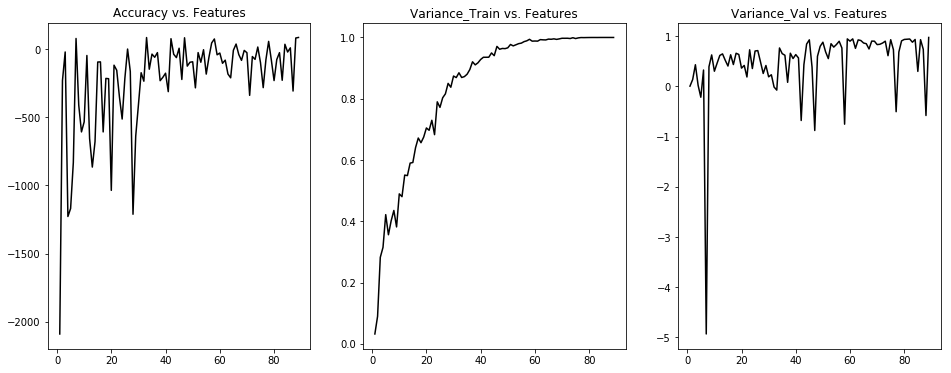

In [12]:
variance_scores_v = []
variance_scores_p = []
n_features = []
accuracies = []

for i in range (1,90): 
    
    selector_2 = RFE(estimator=regr, n_features_to_select= i, step=1)
    selector_2.fit(new_x, y)
    mask_2 = selector_2.get_support()
    new_features_2 = new_x.columns[mask_2]
    new_x_2 = pd.DataFrame(new_x, columns=new_features_2)
   
                      
    x_train, x_val, y_train, y_val = train_test_split(new_x_2, y, test_size=0.1)
    
    regr_reduced = linear_model.LinearRegression()
    regr_reduced.fit(x_train, y_train)
    
    
    y_predicted = regr_reduced.predict(x_train)
    train_score = r2_score(y_train, y_predicted)
    
    y_pred_val = regr_reduced.predict(x_val)
    val_score = r2_score(y_val, y_pred_val) 
    
    errors = abs(y_pred_val - y_val)
    mape = 100 * (errors / y_val)
    accuracy = 100 - np.mean(mape)
    
    
    if i % 1 == 0:
        n_features.append(i)
        variance_scores_v.append(val_score)
        variance_scores_p.append(train_score)
        accuracies.append(accuracy)
        
    
plt.figure(1, figsize=(16, 6))

plt.subplot(1,3,3)
plt.plot(n_features, variance_scores_v, color='black') 
plt.title('Variance_Val vs. Features')
plt.subplot(1,3,2)
plt.plot(n_features, variance_scores_p, color='black')  
plt.title('Variance_Train vs. Features')
plt.subplot(1,3,1)
plt.plot(n_features, accuracies, color= 'black')
plt.title('Accuracy vs. Features')

In [13]:
#Reduce to 40

selector_2 = RFE(estimator=regr, n_features_to_select=40, step=1)
selector_2.fit(new_x, y)
mask_2 = selector_2.get_support()
new_features_2 = new_x.columns[mask_2]
new_x_2 = pd.DataFrame(new_x, columns=new_features_2)
new_x_2.head()

,YAL007C,YBL039C,YBR011C,YBR072W,YBR084W,YCL037C,YDL100C,YDR019C,YDR032C,YDR064W,...,YMR229C,YMR297W,YMR315W,YNL287W,YOR099W,YOR120W,YOR198C,YPL226W,YPL262W,YPR118W
WT,5.003403,5.785767,8.863658,8.408026,5.620283,5.205248,5.677924,7.085311,7.131971,8.642633,...,4.796013,5.667256,3.567328,5.802699,5.663732,5.055168,6.707148,6.473279,7.025441,4.510428
YAL017W,5.155914,5.724483,8.873437,8.308695,5.626475,5.660626,5.727943,7.036922,7.011984,8.163425,...,5.057550,5.672953,3.910539,5.522321,5.461585,4.973550,6.964034,6.426876,6.845798,4.436561
YAR018C,4.993235,5.581594,8.765293,7.887011,5.651666,4.948928,5.574508,7.200973,6.713491,7.936425,...,4.616645,5.557805,4.155543,5.651336,5.447013,4.982194,6.905750,6.304844,7.137920,4.594382
YBL016W,4.663340,5.898318,8.713768,8.337730,5.503705,6.032080,6.403415,7.621363,6.430852,9.248351,...,4.695754,4.921846,4.035389,5.697981,5.244225,4.871737,6.362462,5.638996,6.897313,5.291918
YBL088C,4.984653,5.454617,8.590212,7.913638,5.297984,5.764368,6.187831,7.280504,6.724426,9.093854,...,4.021032,5.459692,4.774991,5.553608,5.439361,5.000468,6.289621,5.348219,6.675133,4.581871


In [14]:
new_x_2.shape

(96, 40)

In [15]:
#file_name_selection2 = '../data/selected features/40/data_selection_738_40.csv'
#new_x_2.to_csv(file_name_selection2, index=True)

### correlation between feature and metabolite

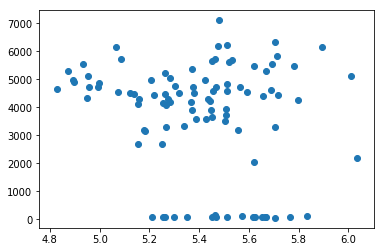

In [16]:
feature = 4
plt.scatter(x= new_x_2.iloc[:,feature], y= y)

### Train and make predictions with the new Dataset

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(new_x_2, y, test_size=0.1)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.11)

In [19]:
#make predictions and compare


regr_738 = linear_model.LinearRegression()
regr_738.fit(x_train, y_train)

y_pred = regr_738.predict(x_train)
y_pred_val = regr_738.predict(x_val)

error_val = mean_squared_error(y_val, y_pred_val)
error_train = mean_squared_error(y_train, y_pred)

#print('Coefficients: \n', regr.coef_)  #show the weights
#show mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_val, y_pred_val))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_val, y_pred_val))

#print((1-error_val)*100)
#print((1-error_train)*100)



Mean squared error: 919844.24
Variance score: 0.08


Pyruvate


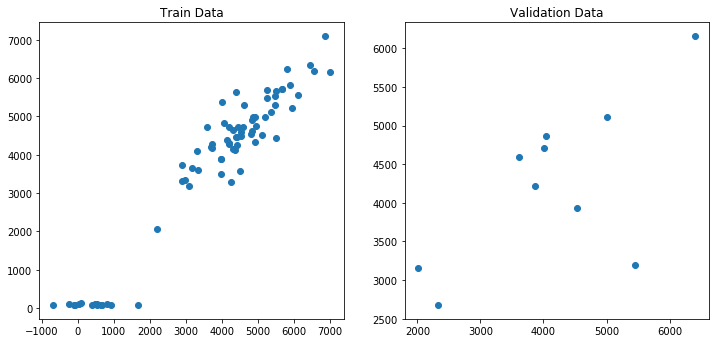

In [20]:
fig = plt.figure(figsize=(12,12))

plt.title(print(mutants.columns.get_values()[position]))


sub1 = plt.subplot(2,2,1)
sub1.set_title('Train Data')
plt.scatter(y= y_train, x=y_pred);


sub2=plt.subplot(2,2,2)
sub2.set_title('Validation Data')
plt.scatter(y= y_val, x=y_pred_val);

In [21]:
new_x_2.shape

(96, 40)

In [22]:
y.shape

(96,)

### Cross Validation
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

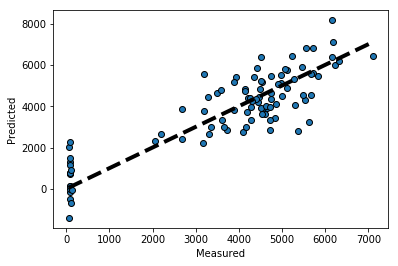

In [23]:
from sklearn.model_selection import cross_val_predict

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(regr_738, new_x_2, y, cv=50)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [24]:
#model_filename = '../models/738.sav'
#pickle.dump(regr_738, open(model_filename, 'wb'))

### Accuracy

In [25]:
errors = abs(y_pred_val - y_val)
mape = 100 * (errors / y_val)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 79.8 %.


<BarContainer object of 40 artists>

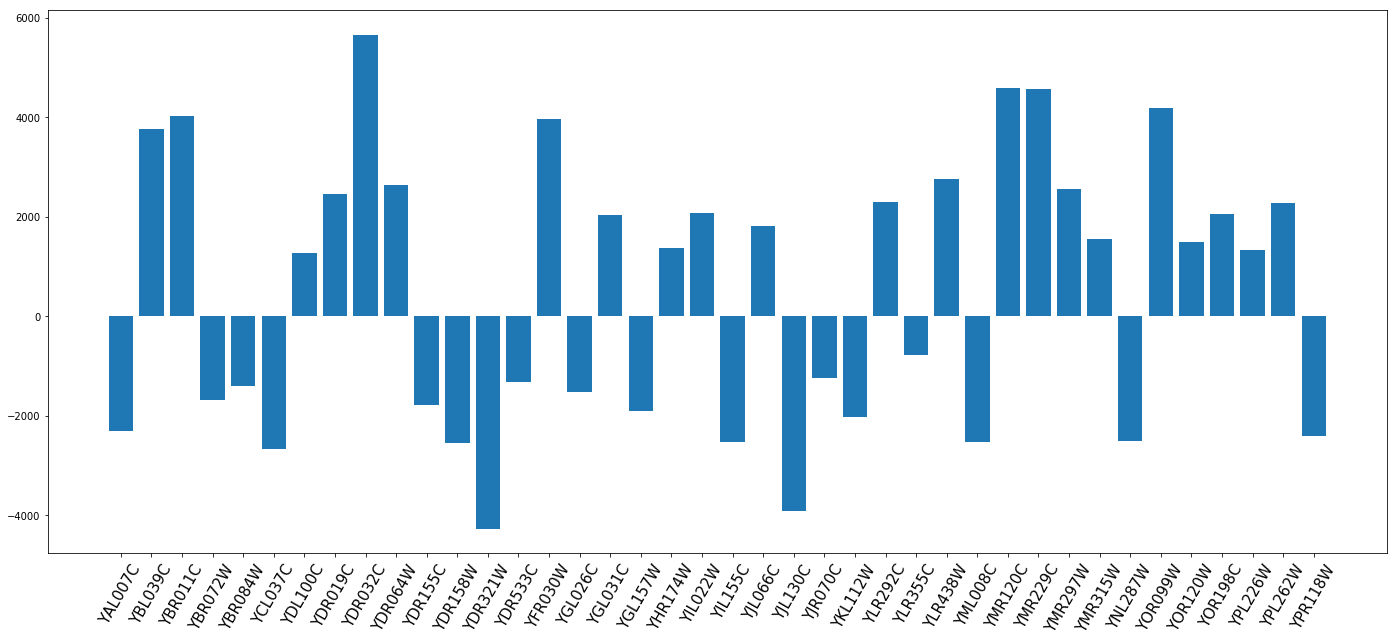

In [26]:
plt.figure(figsize=(24,10))
plt.xticks(fontsize = 15, rotation=60)
plt.bar(new_x_2.columns.get_values(), regr_738.coef_, )

In [27]:
new_x_2.columns.get_values()

array(['YAL007C', 'YBL039C', 'YBR011C', 'YBR072W', 'YBR084W', 'YCL037C',
       'YDL100C', 'YDR019C', 'YDR032C', 'YDR064W', 'YDR155C', 'YDR158W',
       'YDR321W', 'YDR533C', 'YFR030W', 'YGL026C', 'YGL031C', 'YGL157W',
       'YHR174W', 'YIL022W', 'YIL155C', 'YJL066C', 'YJL130C', 'YJR070C',
       'YKL112W', 'YLR292C', 'YLR355C', 'YLR438W', 'YML008C', 'YMR120C',
       'YMR229C', 'YMR297W', 'YMR315W', 'YNL287W', 'YOR099W', 'YOR120W',
       'YOR198C', 'YPL226W', 'YPL262W', 'YPR118W'], dtype=object)

In [28]:
#predictors with biological importance for D-Glucose 6-phosphate

#YCL040W Glucokinase
#YJL153C  Inositol-3-phosphate synthase
#YBR196C Glycolytic enzyme phosphoglucose isomerase
#YMR105C  Phosphoglucomutase; catalyzes the conversion from glucose-1-phosphate to glucose-6-phosphate
#YNL241C Glucose-6-phosphate dehydrogenase (G6PD)

In [29]:
#Create dataframe with the predictors from above

In [30]:
predictors = mutants[['YCL040W','YJL153C','YBR196C','YMR105C','YNL241C']]

In [31]:
predictors.head()

,YCL040W,YJL153C,YBR196C,YMR105C,YNL241C
WT,8.199483,8.745303,8.602317,6.386305,6.678008
YAL017W,8.061042,8.148348,8.653857,5.994002,6.240499
YAR018C,7.965163,7.583946,8.458909,6.078099,6.590718
YBL016W,7.864156,7.130358,8.541610,5.153374,6.710238
YBL088C,7.685407,6.882276,8.817238,5.439663,6.787224


In [32]:
all_predictors = pd.concat([predictors, new_x_2], axis=1, sort=False)

In [33]:
all_predictors.head(5)

,YCL040W,YJL153C,YBR196C,YMR105C,YNL241C,YAL007C,YBL039C,YBR011C,YBR072W,YBR084W,...,YMR229C,YMR297W,YMR315W,YNL287W,YOR099W,YOR120W,YOR198C,YPL226W,YPL262W,YPR118W
WT,8.199483,8.745303,8.602317,6.386305,6.678008,5.003403,5.785767,8.863658,8.408026,5.620283,...,4.796013,5.667256,3.567328,5.802699,5.663732,5.055168,6.707148,6.473279,7.025441,4.510428
YAL017W,8.061042,8.148348,8.653857,5.994002,6.240499,5.155914,5.724483,8.873437,8.308695,5.626475,...,5.057550,5.672953,3.910539,5.522321,5.461585,4.973550,6.964034,6.426876,6.845798,4.436561
YAR018C,7.965163,7.583946,8.458909,6.078099,6.590718,4.993235,5.581594,8.765293,7.887011,5.651666,...,4.616645,5.557805,4.155543,5.651336,5.447013,4.982194,6.905750,6.304844,7.137920,4.594382
YBL016W,7.864156,7.130358,8.541610,5.153374,6.710238,4.663340,5.898318,8.713768,8.337730,5.503705,...,4.695754,4.921846,4.035389,5.697981,5.244225,4.871737,6.362462,5.638996,6.897313,5.291918
YBL088C,7.685407,6.882276,8.817238,5.439663,6.787224,4.984653,5.454617,8.590212,7.913638,5.297984,...,4.021032,5.459692,4.774991,5.553608,5.439361,5.000468,6.289621,5.348219,6.675133,4.581871


### Train and make predictions with all_predictors

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(all_predictors, y, test_size=0.1)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.11)

In [36]:
#make predictions and compare


regr_3 = linear_model.LinearRegression()
regr_3.fit(x_train, y_train)

y_pred = regr_3.predict(x_train)
y_pred_val = regr_3.predict(x_val)

error_val = mean_squared_error(y_val, y_pred_val)
error_train = mean_squared_error(y_train, y_pred)

#print('Coefficients: \n', regr.coef_)  #show the weights
#show mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_val, y_pred_val))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_val, y_pred_val))

#print((1-error_val)*100)
#print((1-error_train)*100)

Mean squared error: 488991.28
Variance score: 0.89


Pyruvate


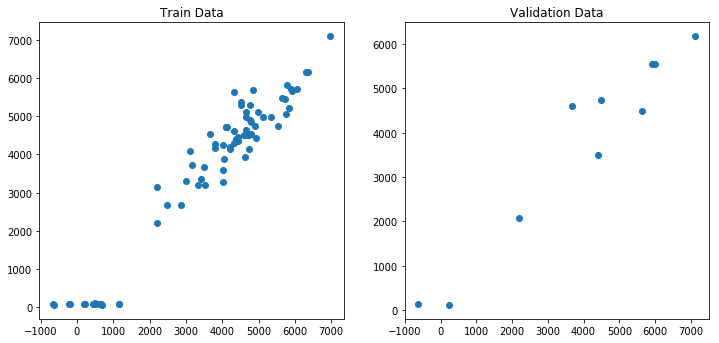

In [37]:
fig = plt.figure(figsize=(12,12))

plt.title(print(mutants.columns.get_values()[position]))


sub1 = plt.subplot(2,2,1)
sub1.set_title('Train Data')
plt.scatter(y= y_train, x=y_pred);


sub2=plt.subplot(2,2,2)
sub2.set_title('Validation Data')
plt.scatter(y= y_val, x=y_pred_val);

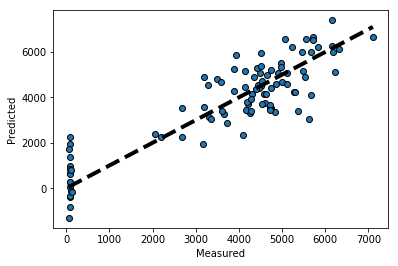

In [38]:
from sklearn.model_selection import cross_val_predict

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(regr_3, all_predictors, y, cv=50)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [39]:
errors = abs(y_pred_val - y_val)
mape = 100 * (errors / y_val)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 25.16 %.


<BarContainer object of 45 artists>

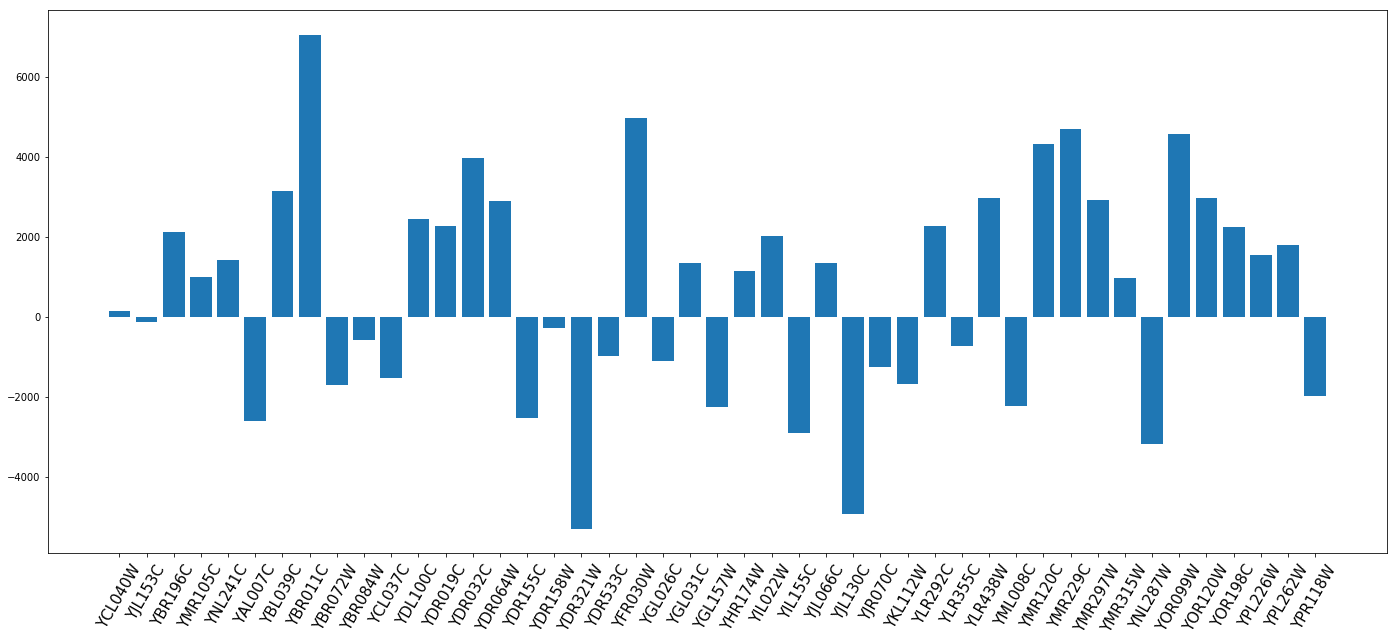

In [40]:
plt.figure(figsize=(24,10))
plt.xticks(fontsize = 15, rotation=60)
plt.bar(all_predictors.columns.get_values(), regr_3.coef_, )


In [41]:
# What are the targets (proteins) that all these metabolites have in common?
#what have the metabolites (targets) in common?